In [15]:
import pandas as pd
df = pd.read_csv("/lunarc/nobackup/projects/lu2024-17-19/J_rAAven/BRAVE/Brave/final_fragments_summary.csv")
df.head()

,Group,Category,GeneName,AAstart,AAend,Structure,Peptide,start,end,width,...,LUTnr,RNAcount,Normalized_RNAcount,bitScore,BC_count,BC_adjusted_count,AAwidth,AAseqlength,AA_pos,AA_rel_pos
0,DNA_AAVlib_DNAse_30cpc_1,Adeno-associated virus,AAV1-VP1,1,15,14aa,AADGYLPDWLEDNL,3,45,42,...,seq_39794,259,1068.533635,79.492373,1,10.061417,14,736,8,0.010870
1,DNA_AAVlib_DNAse_30cpc_1,Adeno-associated virus,AAV1-VP1,2,16,14aa,ADGYLPDWLEDNLS,6,48,42,...,seq_39795,41,169.150112,80.027778,1,7.402160,14,736,9,0.012228
2,DNA_AAVlib_DNAse_30cpc_1,Adeno-associated virus,AAV1-VP1,3,17,14aa,DGYLPDWLEDNLSE,9,51,42,...,seq_39796,50,206.280625,86.100000,1,7.688465,14,736,10,0.013587
3,DNA_AAVlib_DNAse_30cpc_1,Adeno-associated virus,AAV1-VP1,3,25,22aa,DGYLPDWLEDNLSEGIREWWDL,9,75,66,...,seq_90562,55,226.908687,88.530556,1,7.825968,22,736,14,0.019022
4,DNA_AAVlib_DNAse_30cpc_1,Adeno-associated virus,AAV1-VP1,4,18,14aa,GYLPDWLEDNLSEG,12,54,42,...,seq_39797,59,243.411137,81.676984,1,7.927251,14,736,11,0.014946


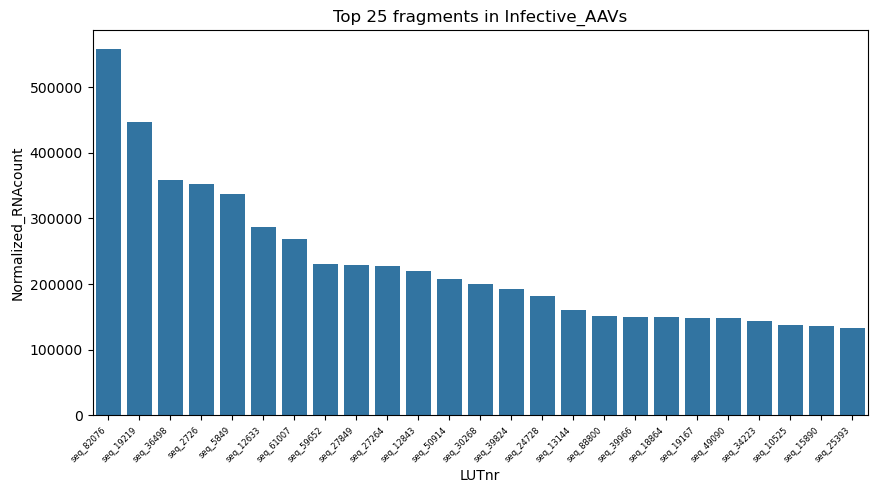

In [3]:
from Plotting_functions import plot_top_counts
plot_top_counts(df, 25, 'Infective_AAVs', 'Normalized_RNAcount')

posx and posy should be finite values
posx and posy should be finite values


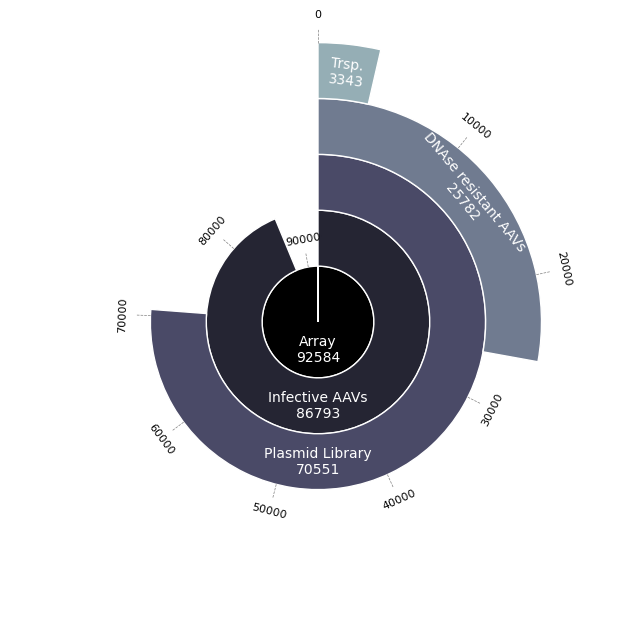

In [4]:
from Plotting_functions import plot_quantities
plot_quantities(df, ['Plasmid_Library', 'DNAse_resistant_AAVs', 'Infective_AAVs', 'Transported_AAVs'],
                ['Plasmid Library', 'DNAse resistant AAVs', 'Infective AAVs', 'Trsp.'],
                {"Array": 92584})

In [5]:
# print all unique group names
print(df['Group'].unique())
# print all unqiue gene names
print(df['GeneName'].unique())

['DNA_AAVlib_DNAse_30cpc_1' 'DNA_AAVlib_DNAse_3cpc_1'
 'DNA_pscAAVlib_Prep2_1' 'DNAse_resistant_AAVs' 'Infective_AAVs'
 'Plasmid_Library' 'Transported_AAVs' 'mRNA_30cpc_4wks_Ctx_RatNr2_1'
 'mRNA_30cpc_4wks_SN_RatNr2_1' 'mRNA_30cpc_4wks_Str_RatNr2_1'
 'mRNA_30cpc_4wks_Th_RatNr2_1' 'mRNA_30cpc_Ctx_RatNr1_1'
 'mRNA_30cpc_Ctx_RatNr7_1' 'mRNA_30cpc_Ctx_RatNr8_1'
 'mRNA_30cpc_HEK293Nr3_1' 'mRNA_30cpc_SN_RatNr1_1'
 'mRNA_30cpc_SN_RatNr7_1' 'mRNA_30cpc_SN_RatNr8_1'
 'mRNA_30cpc_Str_RatNr1_1' 'mRNA_30cpc_Str_RatNr7_1'
 'mRNA_30cpc_Str_RatNr8_1' 'mRNA_30cpc_Th_RatNr1_1'
 'mRNA_30cpc_Th_RatNr7_1' 'mRNA_30cpc_Th_RatNr8_1'
 'mRNA_30cpc_pNeuronNr7_1' 'mRNA_3cpc_4wks_Ctx_RatNr13_1'
 'mRNA_3cpc_4wks_SN_RatNr13_1' 'mRNA_3cpc_4wks_Str_RatNr13_1'
 'mRNA_3cpc_4wks_Th_RatNr13_1' 'mRNA_3cpc_Ctx_RatNr15_1'
 'mRNA_3cpc_Ctx_RatNr19_1' 'mRNA_3cpc_Ctx_RatNr21_1'
 'mRNA_3cpc_HEK293Nr2_1' 'mRNA_3cpc_SN_RatNr15_1' 'mRNA_3cpc_SN_RatNr21_1'
 'mRNA_3cpc_Str_RatNr15_1' 'mRNA_3cpc_Str_RatNr19_1'
 'mRNA_3cpc_Str_RatNr20_

In [10]:
def plot_rna_counts(df: pd.DataFrame, group1: str, group2: str, gene_name: str, column: str, normalize: bool = False):
    """
    Plots the Normalized_RNAcount for two groups across the relative length of a gene.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing the data.
        group1 (str): The name of the first group.
        group2 (str): The name of the second group.
        gene_name (str): The name of the gene to analyze.
        column (str): The column that should be compared between the two groups.
        normalize (bool): Whether to normalize the data by taking the log2 of the columns.

    Returns:
        plot : matplotlib.pyplot
    """
    # Filter the DataFrame for the specified gene and groups
    filtered_df = df[
        (df['GeneName'] == gene_name) &
        (df['Group'].isin([group1, group2]))
    ].copy()  # Use .copy() to avoid the SettingWithCopyWarning

    if filtered_df.empty:
        print(f"No data found for GeneName '{gene_name}' with groups '{group1}' and '{group2}'.")
        return

    # Bin the AA_rel_pos into 1% increments
    bins = np.linspace(0, 1, 101)  # 0%, 1%, ..., 100%
    labels = bins[:-1] + 0.005  # Label bins at the center
    filtered_df['AA_rel_bin'] = pd.cut(filtered_df['AA_rel_pos'], bins=bins, labels=labels, include_lowest=True)

    # Aggregate the Normalized_RNAcount for each bin and group
    aggregated = filtered_df.groupby(['Group', 'AA_rel_bin'], observed=False)[column].sum().reset_index()
    # Pivot the data to have groups as columns
    pivot_df = aggregated.pivot(index='AA_rel_bin', columns='Group', values=column).fillna(0)
    
    if normalize:
        # Normalize the data by taking the log2 of the columns
        pivot_df = pivot_df.apply(lambda x: np.log2(x + 1))

    # Ensure both groups have data in all bins
    pivot_df = pivot_df.reindex(labels, fill_value=0)

    # Prepare data for plotting
    x = pivot_df.index.astype(float)
    y1 = pivot_df[group1].values
    y2 = pivot_df[group2].values

    # Create the back-to-back histogram
    fig, ax = plt.subplots(figsize=(12, 5))

    # Plot group1 and group2 with specified colors and small gaps
    ax.bar(x, y1, width=0.008, align='edge', label=group1, color='#89ABE3')    # Light blue color for group1
    ax.bar(x, -y2, width=0.008, align='edge', label=group2, color='darkblue')   # Dark red color for group2

    # Customize the plot
    ax.set_xlabel('Relative Position in Gene (%)')
    if normalize:
        ax.set_ylabel('log2 of adjusted RNA Count')
    else:
        ax.set_ylabel('adjusted RNA Count')
    ax.set_title(f'{gene_name}')
    
    # Add a legend
    legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title_fontsize='large', handlelength=0, handletextpad=0)

    # Rotate and color the legend text
    legend_colors = ['#89ABE3', 'darkblue']  # Colors corresponding to the groups
    for text, color in zip(legend.get_texts(), legend_colors):
        text.set_rotation(90)
        text.set_color(color)

    ax.axhline(0, color='black', linewidth=0.5)  # Add a horizontal line at y=0
    
    # Set x-axis ticks to show percentage and range from 0 to 100%
    ax.set_xticks(np.linspace(0, 1, 11))
    ax.set_xticklabels([f'{int(tick*100)}%' for tick in ax.get_xticks()])
    ax.set_xlim(0, 1.01)

    # Adjust y-axis to be symmetric
    max_y = max(y1.max(), y2.max())
    ax.set_ylim(-max_y * 1.1, max_y * 1.1)
    
    # change the label of the y-axis to be positive
    ax.set_yticklabels([f'{abs(tick):.0f}' for tick in ax.get_yticks()])

    # Remove the grid
    ax.grid(False)

    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Return the plot
    return plt.show()

/tmp/ipykernel_520919/228782083.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{abs(tick):.0f}' for tick in ax.get_yticks()])


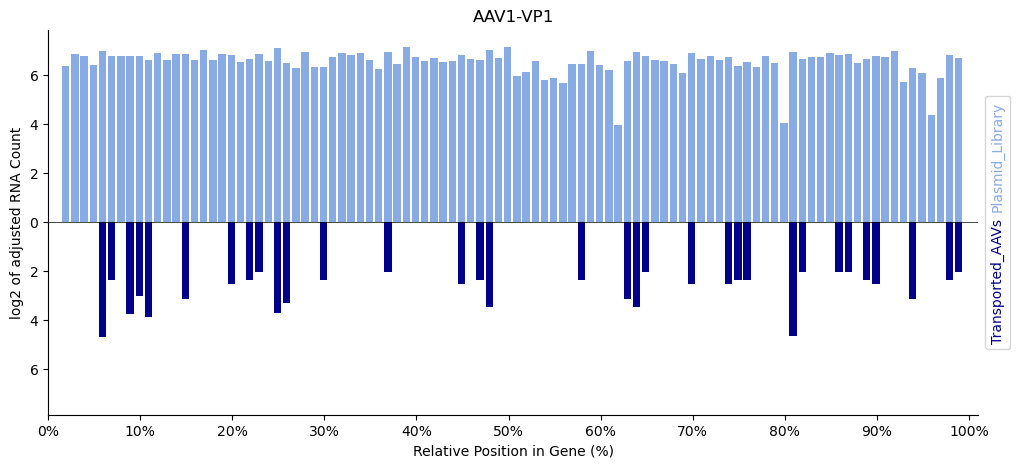

In [16]:
#from Plotting_functions import plot_rna_counts
plot_rna_counts(df, "Plasmid_Library", "Transported_AAVs", "AAV1-VP1", "BC_adjusted_count", normalize=True)


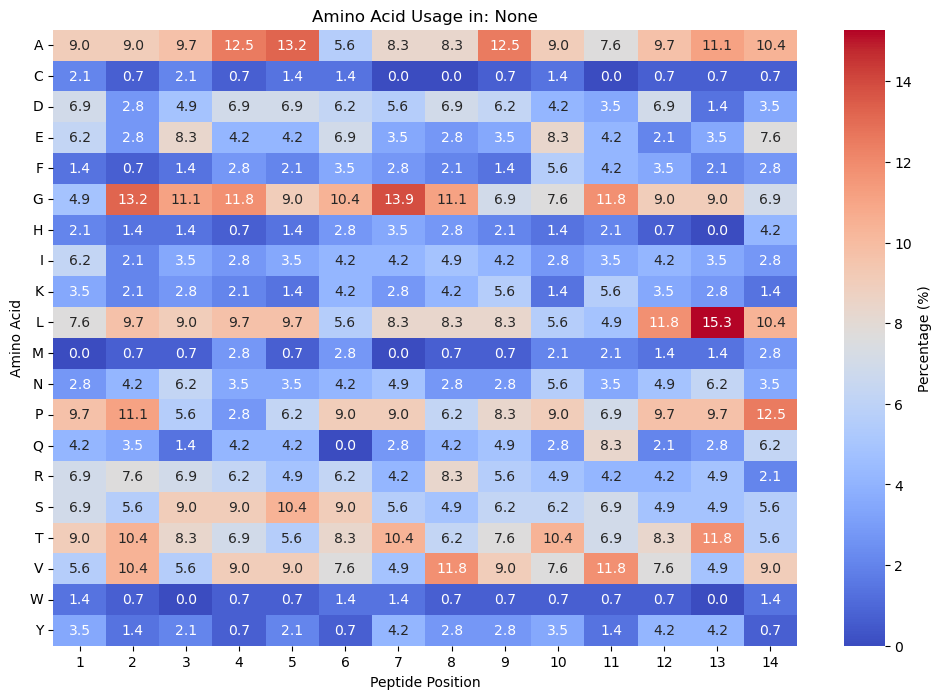

In [ ]:
from Plotting_functions import plot_amino_acid_heatmap
df1 = df[df['Group'] == "mRNA_3cpc_Str_4wks"]
plot_amino_acid_heatmap(df1, structure_name="14aa")